### Load the dataset and packages

In [9]:
import pandas as pd
import numpy as np
from time import time
import os
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
df.corr(method='pearson')
#data = Top15[['Citable docs per Capita','Energy Supply per Capita']]
#correlation = data.corr(method='pearson')

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004823
points,0.007124,1.000000,0.416167
price,0.004823,0.416167,1.000000


In [11]:
df = df.dropna()
df = df.drop_duplicates('description')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


#### df에 '가성비 column' 추가하기


In [20]:
df['cost-effectiveness'] = (df['points']/df['price'])
df2 = df[['description', 'points', 'price', 'cost-effectiveness']]
df.head()
df2.sort_values(by=['cost-effectiveness'], ascending=False)

,description,points,price,cost-effectiveness
59507,"Sweet and fruity, this canned wine feels soft ...",83,4.0,20.750000
104412,This sparkling wine is the best of ManCan's th...,87,5.0,17.400000
8428,"This wine has a deep-gold color, attractive ba...",85,5.0,17.000000
63697,"Tart and juicy, this Cabernet/Merlot/Syrah ble...",89,7.0,12.714286
49652,"Delicate, elegant and floral, with light flavo...",88,7.0,12.571429
49653,"Pineapple, honeysuckle, baked apple and citrus...",88,7.0,12.571429
11809,This light-bodied wine brings enjoyment at a v...,86,7.0,12.285714
80305,"This is a soft, soothing and light-bodied wine...",85,7.0,12.142857
12364,Very focused and pure fruit aromas and flavors...,85,7.0,12.142857
112286,"This flavorful, lively red wine was made with ...",85,7.0,12.142857


#### 상하위 집단을 만들기 위한 기준점 찾기

In [21]:
df2.describe()

,points,price,cost-effectiveness
count,20491.000000,20491.000000,20491.000000
mean,89.558928,41.652384,2.883428
std,2.855710,30.009438,1.614910
min,80.000000,4.000000,0.045206
25%,88.000000,25.000000,1.800000
50%,90.000000,36.000000,2.485714
75%,92.000000,50.000000,3.583333
max,100.000000,2013.000000,20.750000


In [51]:
df2.quantile(.5)['cost-effectiveness']

2.4857142857142858

#### 2.485714가 정확히 50% quantitle 에 해당하는 가성비이므로, 상하위 집단을 나눈다

In [82]:
median = df2.quantile(.5)['cost-effectiveness']
top = df2[df2['cost-effectiveness'] >= median]
bottom = df2[df2['cost-effectiveness'] < median]

In [53]:
top.describe()

,points,price,cost-effectiveness
count,10253.000000,10253.000000,10253.000000
mean,88.403199,24.318638,4.040616
std,2.566615,7.102601,1.522263
min,80.000000,4.000000,2.485714
25%,87.000000,19.000000,2.966667
50%,88.000000,25.000000,3.583333
75%,90.000000,30.000000,4.611111
max,97.000000,38.000000,20.750000


In [54]:
bottom.describe()

,points,price,cost-effectiveness
count,10238.000000,10238.000000,10238.000000
mean,90.716351,59.011526,1.724544
std,2.654842,33.907549,0.463619
min,80.000000,33.000000,0.045206
25%,89.000000,44.000000,1.415385
50%,91.000000,50.000000,1.800000
75%,93.000000,65.000000,2.075000
max,100.000000,2013.000000,2.484848


In [64]:
top['description'].iloc[0].split(' ')

['Soft,',
 'supple',
 'plum',
 'envelopes',
 'an',
 'oaky',
 'structure',
 'in',
 'this',
 'Cabernet,',
 'supported',
 'by',
 '15%',
 'Merlot.',
 'Coffee',
 'and',
 'chocolate',
 'complete',
 'the',
 'picture,',
 'finishing',
 'strong',
 'at',
 'the',
 'end,',
 'resulting',
 'in',
 'a',
 'value-priced',
 'wine',
 'of',
 'attractive',
 'flavor',
 'and',
 'immediate',
 'accessibility.']

In [87]:
# 단어는 그냥 띄어쓰기 기준으로 나누고 상위 집단에만 있는 단어 목록 보기

# column에 대한 split 먼저 실행
top['description_split'] = top['description'].apply(lambda x: x.split(' '))

# list 형태로 변환
top_list = top['description_split'].values.tolist()
print(type(top_list), len(top_list), top_list[0])

"""
top: df
    top['description_split']  df column
    .values numpy array
    .tolist() <- numpy 안에 있는 함수이고 list로 바꿔줌



first_strip = first.split(' ')

empty_list = list()
for ind, row in top.iterrows():
    strip = row['description'].split(' ')
    empty_list.append(strip)
"""    
bottom['description_split'] = bottom['description'].apply(lambda x: x.split(' ')) 
bottom_list = bottom['description_split'].values.tolist()
print(type(bottom_list), len(bottom_list), bottom_list[0])

C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'list'> 10253 ['Soft,', 'supple', 'plum', 'envelopes', 'an', 'oaky', 'structure', 'in', 'this', 'Cabernet,', 'supported', 'by', '15%', 'Merlot.', 'Coffee', 'and', 'chocolate', 'complete', 'the', 'picture,', 'finishing', 'strong', 'at', 'the', 'end,', 'resulting', 'in', 'a', 'value-priced', 'wine', 'of', 'attractive', 'flavor', 'and', 'immediate', 'accessibility.']
<class 'list'> 10238 ['Much', 'like', 'the', 'regular', 'bottling', 'from', '2012,', 'this', 'comes', 'across', 'as', 'rather', 'rough', 'and', 'tannic,', 'with', 'rustic,', 'earthy,', 'herbal', 'characteristics.', 'Nonetheless,', 'if', 'you', 'think', 'of', 'it', 'as', 'a', 'pleasantly', 'unfussy', 'country', 'wine,', "it's", 'a', 'good', 'companion', 'to', 'a', 'hearty', 'winter', 'stew.']


In [96]:
def flatten(ll):
    r = []
    for l in ll:
        r += l
    return r

ftop = flatten(top_list)
fbottom = flatten(bottom_list)
diff = set(ftop) - set(fbottom)
print(list(diff)[:30])

['Bottlings', 'flower-filled', 'unfold,', 'planned', 'Tempranillo;', 'branding', 'everybody,', '(1/3', 'bucco', 'arrangement', 'symbiosis', 'new—was', 'five-clone', 'Syrca', 'Regardless,', 'eyed.', 'Looking', 'Meyer-lemon-pith', 'Newly', 'imagine;', 'mid-sip,', 'palate—which', 'Pfalz', 'Anderson-Ross', 'owner,', 'Barton,', 'berry-like.', 'burrito', 'indecipherable', 'spruces']


In [111]:
from collections import Counter

count = defaultdict(lambda: 0)
for top_word in ftop:
    count[top_word] += 1

for bottom_word in fbottom:
    count[bottom_word] -= 1
    
items = list(count.items()) # [ [word, count], ... ]
items.sort(key=lambda i:-i[1])
print('가성비 좋은 애들 특징')
print(items[:50])
print('가성비 나쁜 애들 특징')
print(items[-50:])

# 상위 50% 하위 50% -> 상위 25% 하위 25%
# 2 x 2 셀로 나눠보기 - ?????????? list -> array?
A = 가격 상위 50% 이면서 평점 상위 50% 
B = 가격 하위 50% 이면서 평점 상위 50%
C = 가격 상위 50% 이면서 평점 하위 50%
D = 가격 하위 50% 이면서 평점 하위 50%

A = 


3A - B - C - D
3B - A - C - D


가성비 좋은 애들 특징
[('flavors', 873), ('has', 552), ('apple', 442), ('like', 393), ('pear', 371), ('peach', 345), ('dry', 344), ('sweet', 340), ('citrus', 314), ('white', 310), ('It', 309), ('light', 306), ('lemon', 305), ('lime', 302), ('but', 301), ('good', 300), ('aromas', 291), ('flavors.', 264), ("It's", 225), ('tastes', 218), ('dry,', 212), ('crisp', 204), ('very', 204), ('fruity', 201), ('grapefruit', 200), ('green', 199), ('color,', 196), ('just', 188), ('melon', 187), ('lightly', 185), ('A', 184), ('stainless', 182), ('Blanc', 174), ('slightly', 166), ('pink', 162), ('some', 160), ('ripe', 159), ('or', 157), ('texture', 155), ('not', 154), ('smells', 146), ('residual', 146), ('bit', 146), ('fruit', 145), ('pear,', 144), ('tropical', 144), ('flavors,', 140), ('easy', 140), ('wine.', 140), ('neutral', 139)]
가성비 나쁜 애들 특징
[('layers', -205), ('dense', -209), ('pepper', -220), ('as', -221), ('tannin', -224), ('oak', -231), ('acidity', -232), ('an', -233), ('structure', -234), ('wine,', -2

In [151]:
price_median = df2.quantile(.5)['price']
points_median = df2.quantile(.5)['points']
print(price_median, points_median)

A = df2[(df2.price >= price_median) & (df2.points >= points_median)]
B = df2[(df2.price < price_median) & (df2.points >= points_median)]
C = df2[(df2.price >= price_median) & (df2.points < points_median)]
D = df2[(df2.price < price_median) & (df2.points < points_median)]

# column에 대한 split 먼저 실행
A['description_split'] = A['description'].apply(lambda x: x.split(' '))
B['description_split'] = B['description'].apply(lambda x: x.split(' '))
C['description_split'] = C['description'].apply(lambda x: x.split(' '))
D['description_split'] = D['description'].apply(lambda x: x.split(' '))

# list 형태로 변환
A_list = A['description_split'].values.tolist()   # 현재는, list 안에 list 가 있음
B_list = B['description_split'].values.tolist()
C_list = C['description_split'].values.tolist()
D_list = D['description_split'].values.tolist()

#print(type(top_list), len(top_list), top_list[0])

# list 하나 벗겨내기
def flatten(ll):
    r = []
    for l in ll:
        r += l
    return r

flat_A = flatten(A_list)
flat_B = flatten(B_list)
flat_C = flatten(C_list)
flat_D = flatten(D_list)



#3*flat_A - flat_B - flat_C - flat_D

count = defaultdict(lambda: 0)
for word in flat_A:
    count[word] += 3
    
for word in flat_B:
    count[word] -= 1
    
for word in flat_C:
    count[word] -= 1
        
for word in flat_D:
    count[word] -= 1
    
items = list(count.items()) # [ [word, count], ... ]
items.sort(key=lambda i:-i[1])
items[:50]



def word_count(x,y,z,h):
    count = defaultdict(lambda: 0)
    for word in x:
        count[word] += 3

    for word in y:
        count[word] -= 1

    for word in z:
        count[word] -= 1

    for word in h:
        count[word] -= 1
    
    items = list(count.items())
    items.sort(key=lambda i:-i[1])
    return items

print(word_count(flat_A,flat_B,flat_C,flat_D)[:50])
print('---------------------')
print(word_count(flat_B,flat_A,flat_C,flat_D)[:50])
print('---------------------')
print(word_count(flat_C,flat_A,flat_B,flat_D)[:50])
print('---------------------')
print(word_count(flat_D,flat_B,flat_C,flat_A)[:50])



36.0 90.0


C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

[('and', 40495), ('of', 22842), ('the', 22089), ('a', 15068), ('with', 10356), ('in', 9243), ('this', 8681), ('is', 7435), ('on', 7090), ('black', 6281), ('to', 5559), ('from', 5248), ('wine', 4947), ('The', 4752), ('it', 4125), ('This', 3001), ('by', 2958), ('that', 2896), ('cherry', 2799), ('fruit', 2611), ('palate', 2500), ('through', 2431), ('dark', 2313), ('Cabernet', 2285), ('its', 2275), ('flavors', 2129), ('aromas', 2045), ('for', 1973), ('nose', 1928), ('an', 1887), ('dried', 1868), ('as', 1825), ('vineyard', 1813), ('are', 1782), ('acidity', 1726), ('palate,', 1719), ('red', 1682), ('finish.', 1603), ('tannins', 1544), ('shows', 1523), ('bottling', 1388), ("It's", 1367), ('A', 1350), ('into', 1322), ('savory', 1284), ('cherry,', 1279), ('offers', 1260), ('blackberry', 1250), ('rich', 1248), ('raspberry', 1216)]
---------------------
[('grapefruit', 220), ('lemon', 215), ('delicious', 160), ('lime', 142), ('citrus', 128), ('peach', 127), ('yellow', 127), ('excellent', 117), ('

In [154]:
print(len(A))
print(len(B))
print(len(C))
print(len(D))

7647
3485
2732
6627


In [164]:
from collections import Counter

price_median = df2.quantile(.5)['price']
points_median = df2.quantile(.5)['points']
print(price_median, points_median)

A = df2[(df2.price >= price_median) & (df2.points >= points_median)]
B = df2[(df2.price < price_median) & (df2.points >= points_median)]
C = df2[(df2.price >= price_median) & (df2.points < points_median)]
D = df2[(df2.price < price_median) & (df2.points < points_median)]

parts = [A, B, C, D]

def flatten(ll):
    r = []
    for l in ll:
        r += l
    return r

def extract_words(df):
    df['description_split'] = df['description'].apply(lambda x: x.split(' '))
    df_list = df['description_split'].values.tolist()   # 현재는, list 안에 list 가 있음
    return flatten(df_list)
    
flats = [extract_words(part) for part in parts]
 
def dominant_words(word_list, all_word_lists):
    count = Counter(word_list)
    count = count + count + count
    for other_list in all_word_lists:
        if word_list is not other_list:
            count_other = Counter(other_list)
            count.subtract(count_other)
    return count

counters = [dominant_words(flat, flats) for flat in flats]

for counter in counters:
    print(counter.most_common(50))
    print('------------------------')

36.0 90.0


C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[('and', 40495), ('of', 22842), ('the', 22089), ('a', 15068), ('with', 10356), ('in', 9243), ('this', 8681), ('is', 7435), ('on', 7090), ('black', 6281), ('to', 5559), ('from', 5248), ('wine', 4947), ('The', 4752), ('it', 4125), ('This', 3001), ('by', 2958), ('that', 2896), ('cherry', 2799), ('fruit', 2611), ('palate', 2500), ('through', 2431), ('dark', 2313), ('Cabernet', 2285), ('its', 2275), ('flavors', 2129), ('aromas', 2045), ('for', 1973), ('nose', 1928), ('an', 1887), ('dried', 1868), ('as', 1825), ('vineyard', 1813), ('are', 1782), ('acidity', 1726), ('palate,', 1719), ('red', 1682), ('finish.', 1603), ('tannins', 1544), ('shows', 1523), ('bottling', 1388), ("It's", 1367), ('A', 1350), ('into', 1322), ('savory', 1284), ('cherry,', 1279), ('offers', 1260), ('blackberry', 1250), ('rich', 1248), ('raspberry', 1216)]
------------------------
[('grapefruit', 220), ('lemon', 215), ('delicious', 160), ('lime', 142), ('citrus', 128), ('peach', 127), ('yellow', 127), ('excellent', 117),

In [ ]:
a = [1, 2]
b = [1, 2]
# a랑 b는 다른 list
a is b # False
a == b # True

# 새로 생긴 호기심
1. 평가자마다 말이 많은지 아닌지 = 평가자마다의 언어 습관을 볼 수 있는가?
2. A B C D 그룹 나눌 때 sampling을 좀 더 공평하게 하기
3. 평가 갯수가 같아도 말이 많으면 또 불공평해지니까 이것도 맞추기. 말의 길이 normalization? 말의 길이 count distribution 보는 것도 좋은 방법



## 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'love': 3, 'what': 6, 'do': 0, 'your': 8, 'want': 5, 'should': 4, 'you': 7, 'know': 1, 'like': 2}


In [39]:
# Preprocessing/filtering function
import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def filtering_function(token_list):
    result = []
    for e in token_list:
        if e not in stopwords and len(e) >= 2:
            result.append(e)
    return result

# Token_review 를 filtering_function 이용하여 필터링
top["description"] = top["description"].apply(filtering_function)

C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,description,points,price,cost-effectiveness
10,[],87,19.0,4.578947
23,[],87,22.0,3.954545
62,[],86,25.0,3.440000
64,[],86,26.0,3.307692
78,[],86,25.0,3.440000


In [26]:
points_class = ["high" if df.iloc[i]['points'] >= 95
                 else
                 "med" if df.iloc[i]['points'] >= 85
                 else
                 "low"
                 for i in range(df.shape[0])]
df["points_class"] = points_class


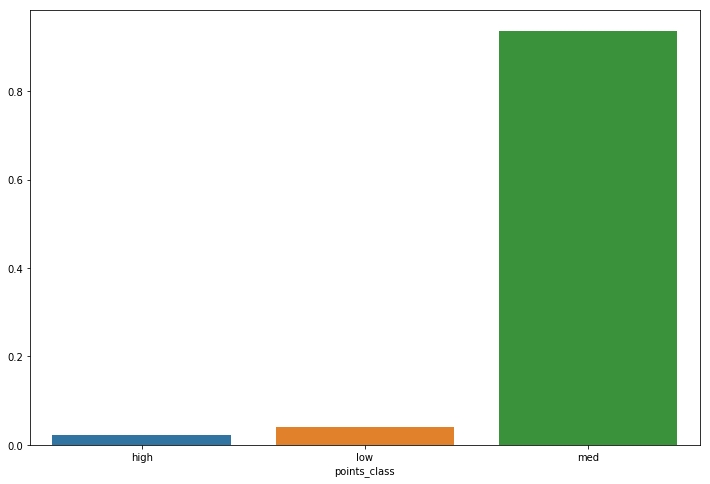

In [27]:
dist = df.groupby(["points_class"]).size()
dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

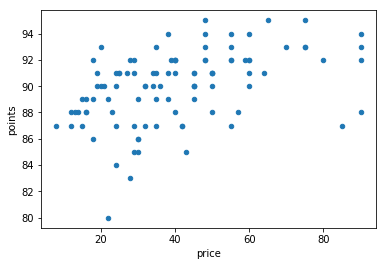

In [22]:
df[df['price'] < 100].sample(100).plot.scatter(x='price', y='points')

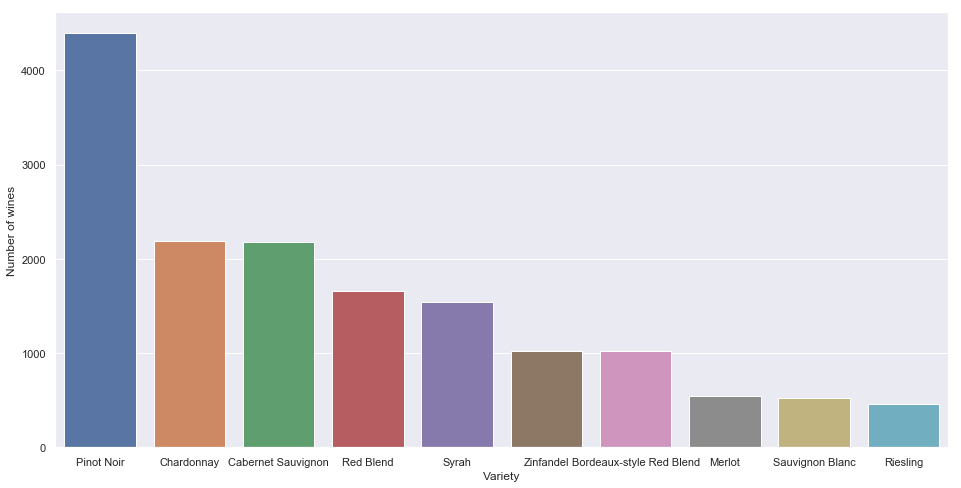

In [52]:
plt.figure(figsize = (16,8))
sns.set(style = "darkgrid")
sns.barplot(x = df.variety.value_counts()[:10].index, y = df.variety.value_counts()[:10].values)
plt.xlabel("Variety")
plt.ylabel("Number of wines")
plt.show()

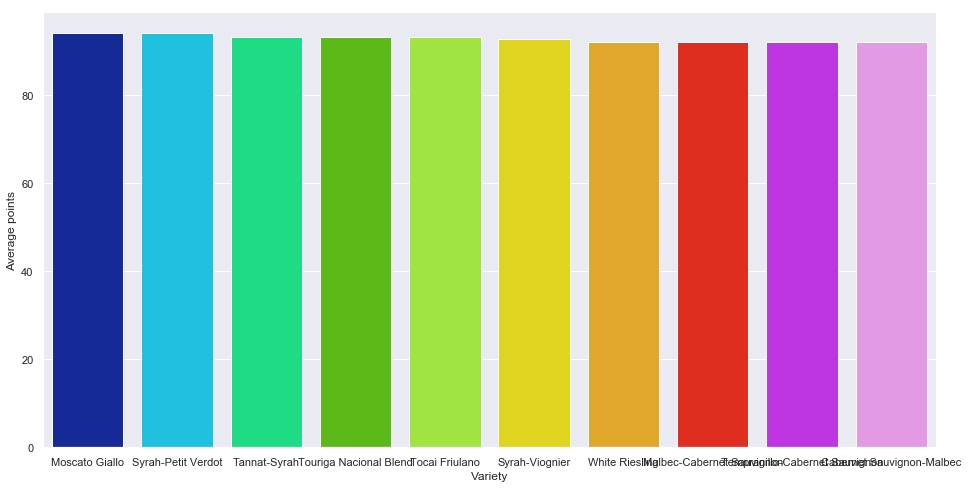

In [53]:
plt.figure(figsize = (16,8))
avg = sns.barplot(x = df.groupby("variety").mean().sort_values(by = "points", ascending = False).points.index[:10], 
                 y = df.groupby("variety").mean().sort_values(by = "points", ascending = False).points.values[:10],
                 palette = "gist_ncar")
plt.xlabel("Variety")
plt.ylabel("Average points")
plt.show()

In [55]:
df['description'] = df['description'].str.lower()

In [49]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

punc = [',', '.', ':', ';', '""', "''"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = top['description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words, analyzer = 'word')
X = 

In [ ]:
#TfidfVectorizer usage example

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
     'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer(max_features=5, analyzer='word', stop_words=['the', 'and'])
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X) # len(corpus) X len(tokens)

#    1 2 3 6 8 -> document first is the this -> this is the first document

In [18]:
#Fetch wordcount for each abstract
df['word_count'] = df['description'].apply(lambda x: len(str(x).split(" ")))
df[['description','word_count']].head()

,description,word_count
0,"Aromas include tropical fruit, broom, brimston...",24
1,"This is ripe and fruity, a wine that is smooth...",39
2,"Tart and snappy, the flavors of lime flesh and...",28
3,"Pineapple rind, lemon pith and orange blossom ...",33
4,"Much like the regular bottling from 2012, this...",41


In [19]:
##Descriptive statistics of word counts
df.word_count.describe()

count    129971.000000
mean         40.384440
std          11.113601
min           3.000000
25%          33.000000
50%          39.000000
75%          47.000000
max         135.000000
Name: word_count, dtype: float64

In [32]:
#Identify common words
import pandas
top_freq = pandas.Series(' '.join(top['description']).split()).value_counts()[:20]
top_freq

and        27924
of         14658
the        13660
a          13219
with        9032
is          6193
this        6178
in          5932
to          4263
wine        4060
on          3884
flavors     3848
The         3800
This        3187
fruit       3075
it          2616
aromas      2375
that        2328
from        2326
are         2103
dtype: int64

In [33]:
bottom_freq = pandas.Series(' '.join(bottom['description']).split()).value_counts()[:20]
bottom_freq


and        31193
of         17412
the        16575
a          13649
with        9048
in          7289
this        7009
is          6508
on          5102
to          4574
wine        4369
The         4180
black       3330
from        3254
it          3107
This        3104
flavors     2975
fruit       2930
that        2396
aromas      2084
dtype: int64